<a href="https://colab.research.google.com/github/nagaraju-urakonda/DAUP_PROJECT/blob/main/powercounsmption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data_path = "/content/power consumption.csv"
df = pd.read_csv(data_zpath)

In [ ]:
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone 1                 52416 non-null  float64
 7   Zone 2                 52416 non-null  float64
 8   Zone 3                 52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None


In [ ]:

if 'DateTime' in df.columns:
    df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', dayfirst=True)
    df.dropna(subset=['DateTime'], inplace=True)
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df.drop(columns=['DateTime'], inplace=True)



In [ ]:

scaler = StandardScaler()
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Zone 1', 'Zone 2', 'Zone 3', 'Year', 'Month', 'Day', 'Hour']
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
df[existing_numerical_cols] = scaler.fit_transform(df[existing_numerical_cols])


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load dataset
data_path = "/content/power consumption.csv"
df = pd.read_csv(data_path)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64'])

# Calculate skewness and kurtosis
skewness = numeric_cols.apply(skew)
kurt = numeric_cols.apply(kurtosis)

# Display results
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print(skew_kurt_df)


                       Skewness  Kurtosis
Temperature            0.196714 -0.303407
Humidity              -0.625148 -0.121962
Wind Speed             0.462410 -1.783114
general diffuse flows  1.306936  0.402615
diffuse flows          2.456836  7.002119
Zone 1                 0.228857 -0.754097
Zone 2                 0.328867 -0.437470
Zone 3                 1.023842  1.086175


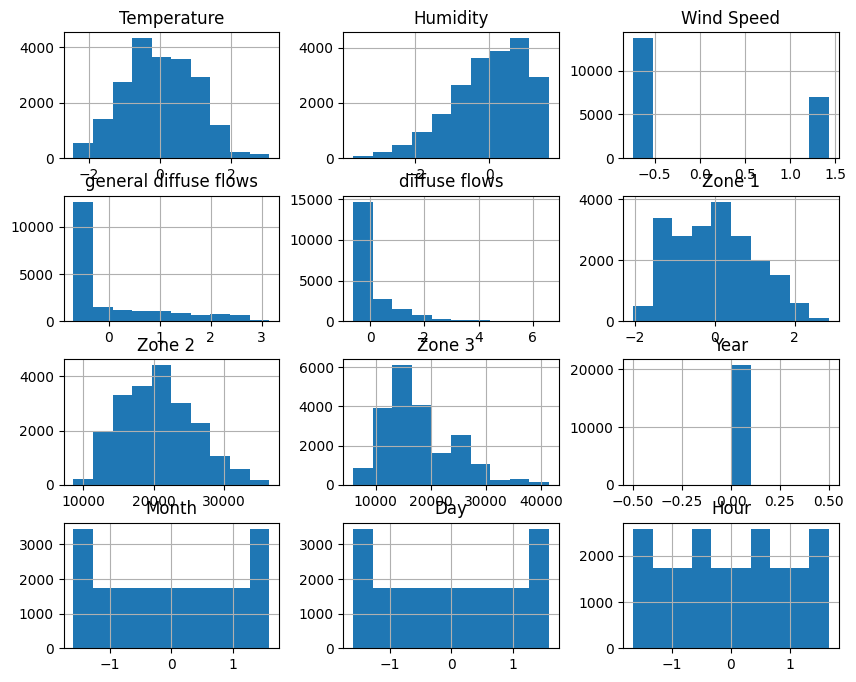

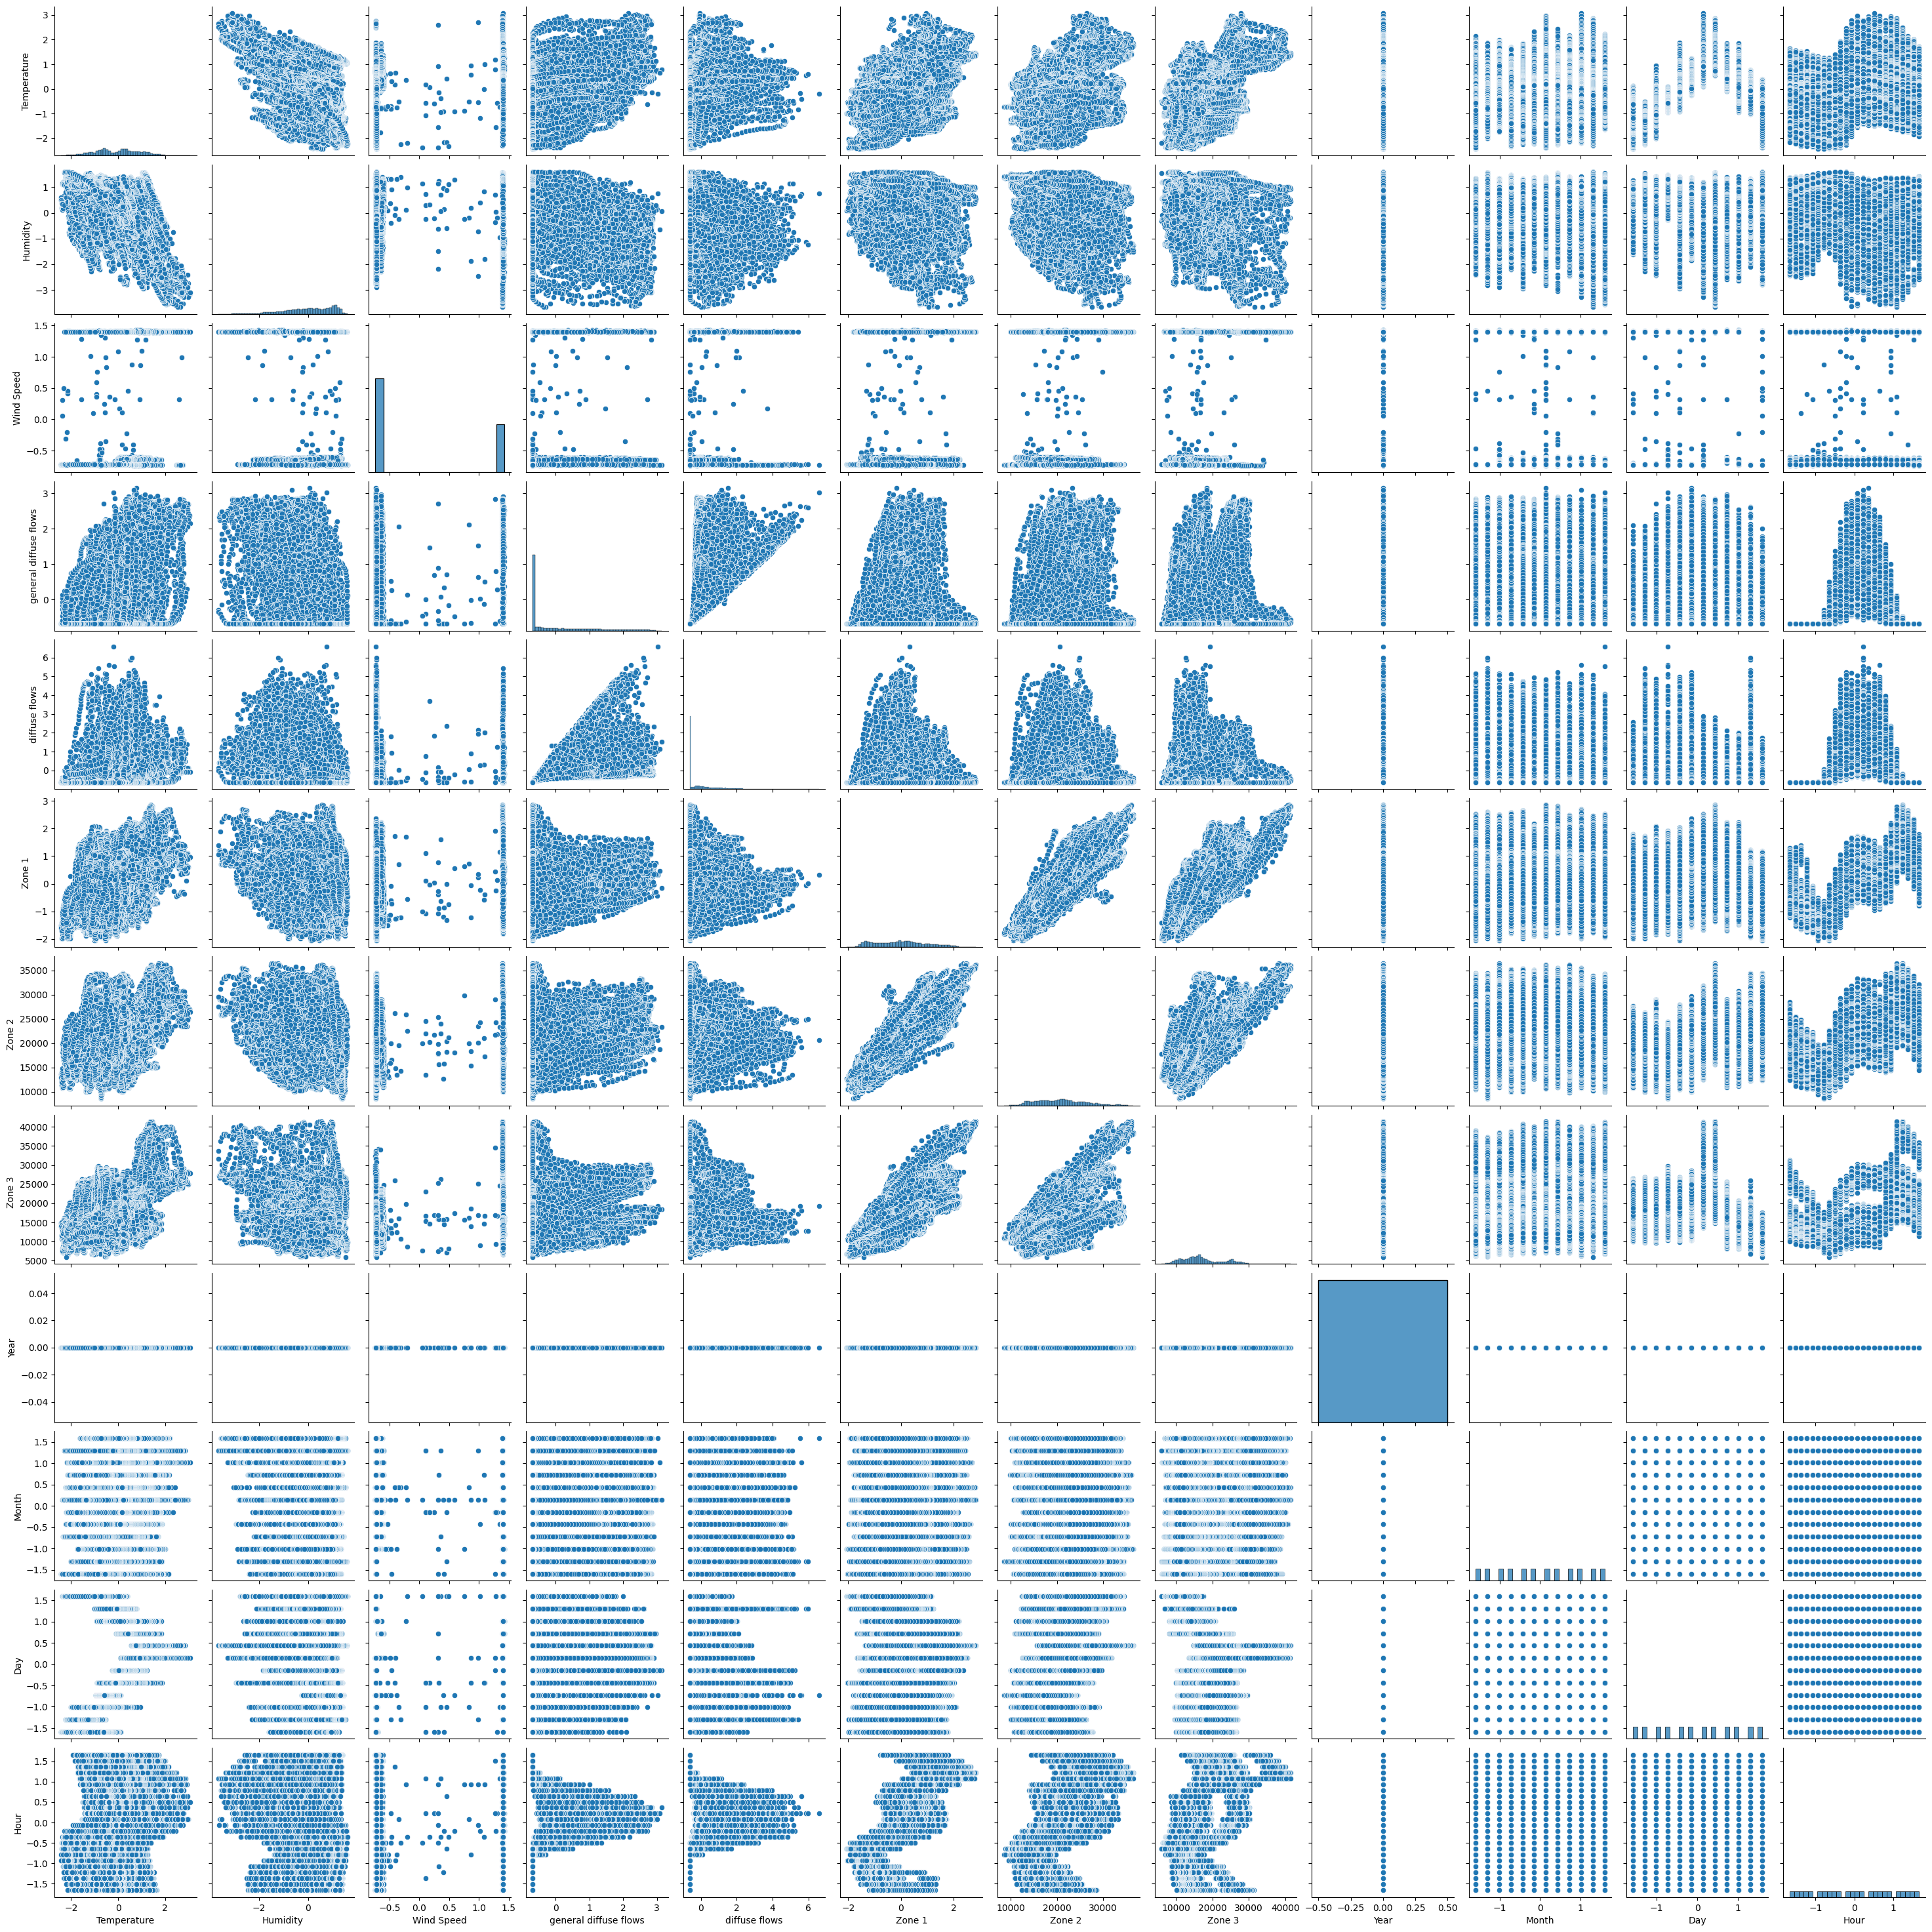

In [ ]:
def visualize_data(df):
    df.hist(figsize=(10, 8))
    plt.show()
    sns.pairplot(df)
    plt.show()
visualize_data(df)

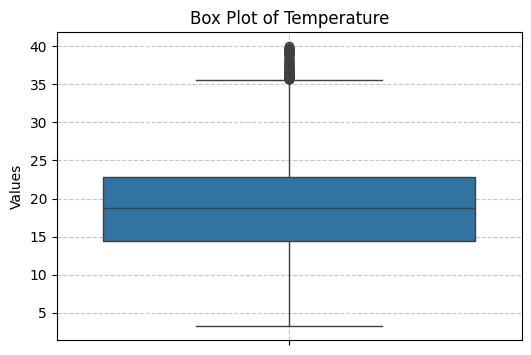

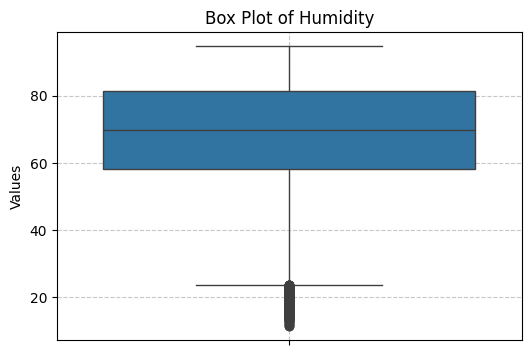

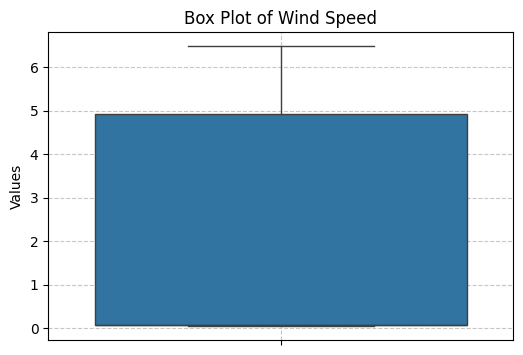

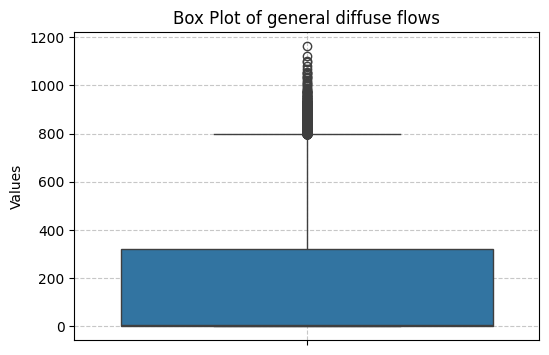

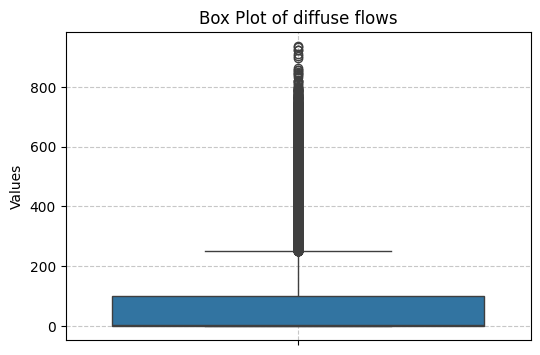

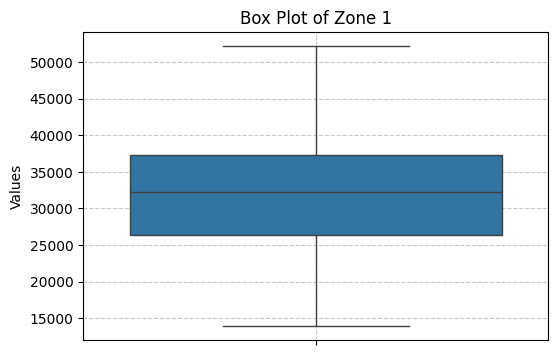

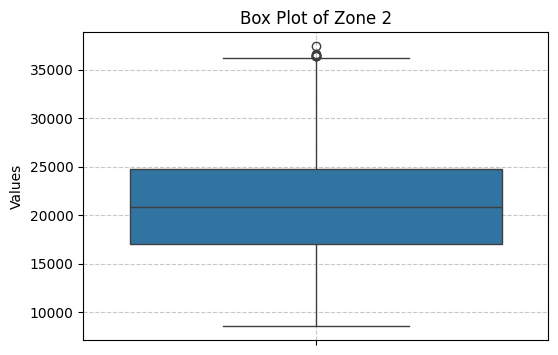

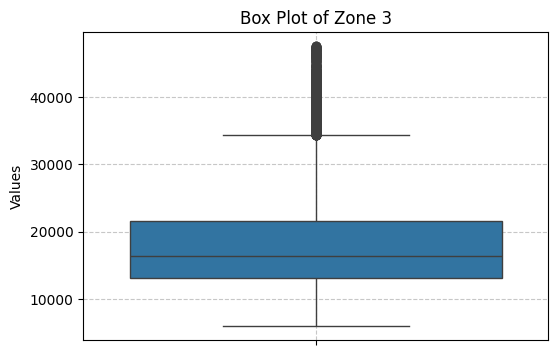

In [ ]:


# Load the dataset
file_path = "/content/power consumption.csv"  # Update this with the correct path
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=["number"])

# Creating separate box plots for each numerical column
for col in numerical_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel("Values")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


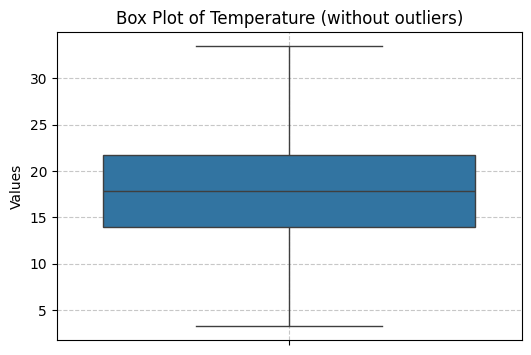

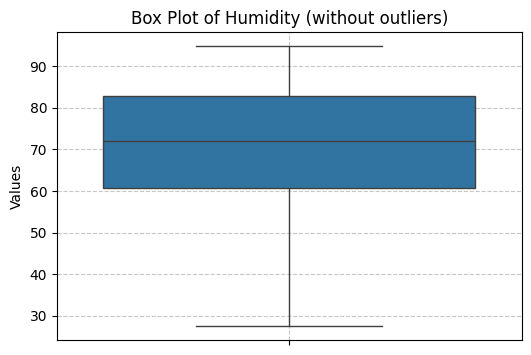

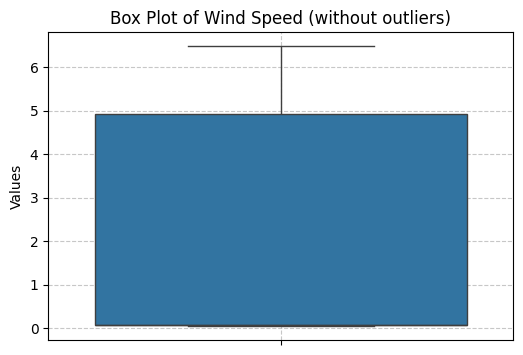

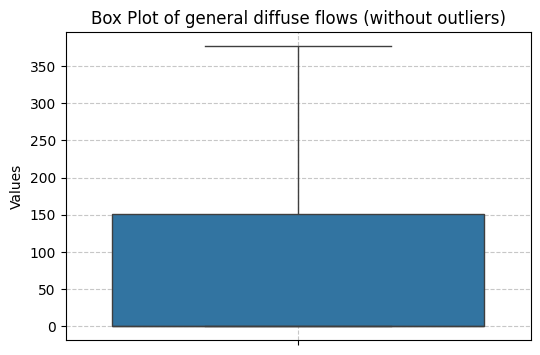

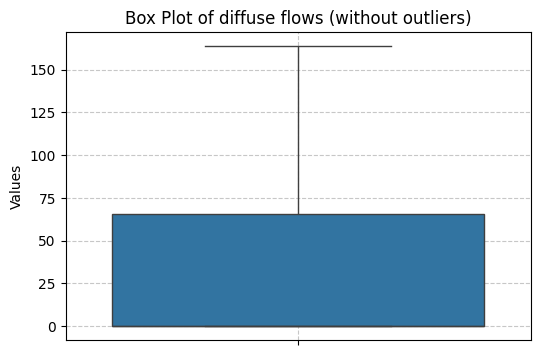

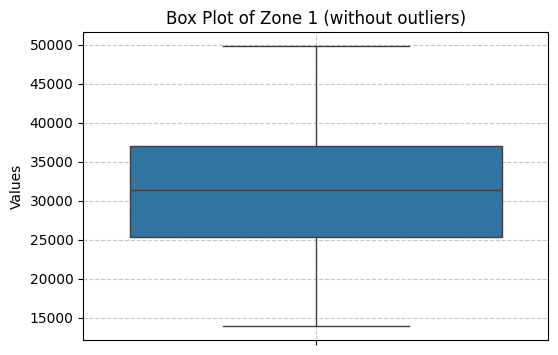

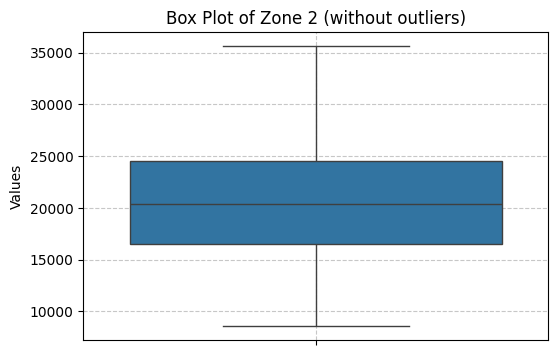

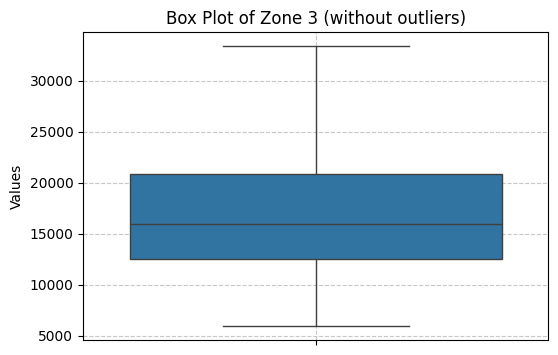

In [ ]:


# Load the dataset
file_path = "/content/power consumption.csv"  # Update this with the correct path
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=["number"])

# Function to remove outliers using IQR method
def remove_outliers(data, col, threshold=1.5):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Create a cleaned dataset without outliers
df_cleaned = df.copy()
for col in numerical_cols.columns:
    df_cleaned = remove_outliers(df_cleaned, col, threshold=1.5)

# Generate box plots without outlier markers (black dots)
for col in numerical_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[col], showfliers=False)  # Hide outliers
    plt.title(f"Box Plot of {col} (without outliers)")
    plt.ylabel("Values")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


In [ ]:
def split_data(df):
    if 'Zone 1' in df.columns:
        X = df.drop(columns=['Zone 1'])
        y = df['Zone 1']
        return train_test_split(X, y, test_size=0.2, random_state=42)
    return None, None, None, None

X_train, X_test, y_train, y_test = split_data(df)


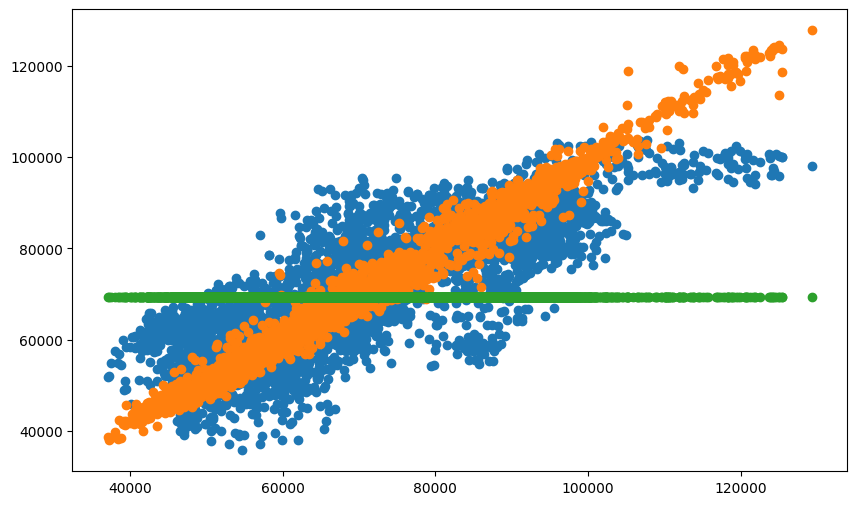

In [ ]:
def train_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "SVM": SVR()
    }

    results = {}
    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2 Score": r2}
        plt.scatter(y_test, y_pred, label=name)

    return results

if X_train is not None:
    results = train_models(X_train, X_test, y_train, y_test)

In [ ]:
    for model, scores in results.items():
        print(f"{model}: MSE={scores['MSE']}, R2 Score={scores['R2 Score']}")

Linear Regression: MSE=0.139195127325885, R2 Score=0.8616821547126732
Random Forest: MSE=0.008287076928249823, R2 Score=0.9917651526568009
SVM: MSE=0.14808541671794306, R2 Score=0.8528478966727973


<ipython-input-23-369e23b7ba82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['DateTime'].dt.hour
<ipython-input-23-369e23b7ba82>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['DateTime'].dt.day
<ipython-input-23-369e23b7ba82>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/


Model Performance Metrics:
               Model          MAE           MSE  R2 Score
0      Random Forest  1400.865409  4.579741e+06  0.984080
1  Linear Regression  8043.398606  1.025032e+08  0.643680
2  Gradient Boosting  3266.128993  1.900606e+07  0.933931


<ipython-input-23-369e23b7ba82>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=metrics_df, palette="coolwarm", ax=axes[0])
<ipython-input-23-369e23b7ba82>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=metrics_df, palette="coolwarm", ax=axes[1])
<ipython-input-23-369e23b7ba82>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=metrics_df, palette="coolwarm", ax=axes[2])
<ipython-input-23-369e23b7ba82>:79: UserWarning: set_ticklabels() should only be used wit

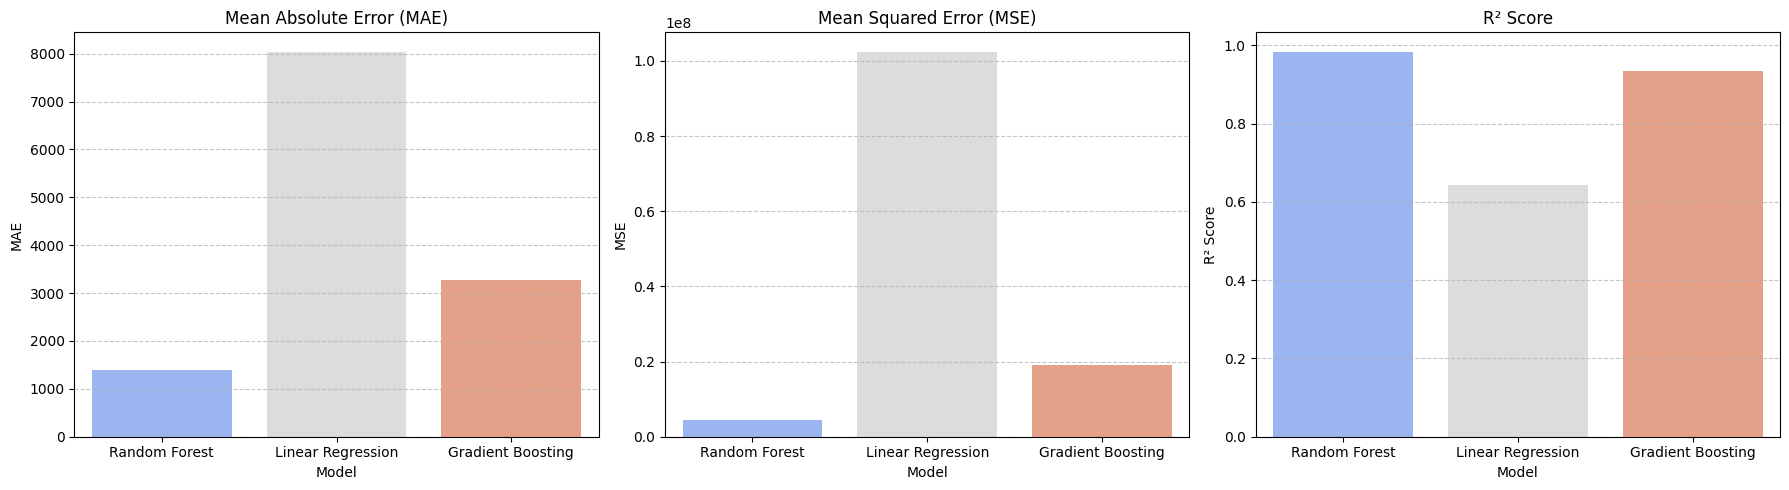

In [ ]:

# Load and preprocess dataset
file_path = "power consumption.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Remove spaces in column names
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['DateTime'])

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
df.drop(columns=['DateTime'], inplace=True)

# Define target variable
df['Total_Power_Consumption'] = df['Zone 1'] + df['Zone 2'] + df['Zone 3']
X = df.drop(columns=['Zone 1', 'Zone 2', 'Zone 3', 'Total_Power_Consumption'])
y = df['Total_Power_Consumption']

# Handle missing values
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Normalize the data
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

metrics = {"Model": [], "MAE": [], "MSE": [], "R2 Score": []}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics["Model"].append(name)
    metrics["MAE"].append(mae)
    metrics["MSE"].append(mse)
    metrics["R2 Score"].append(r2)

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Print metrics in tabular format
print("\nModel Performance Metrics:")
print(metrics_df)

# Plot bar charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="MAE", data=metrics_df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Mean Absolute Error (MAE)", fontsize=12)
axes[0].set_ylabel("MAE")

sns.barplot(x="Model", y="MSE", data=metrics_df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Mean Squared Error (MSE)", fontsize=12)
axes[1].set_ylabel("MSE")

sns.barplot(x="Model", y="R2 Score", data=metrics_df, palette="coolwarm", ax=axes[2])
axes[2].set_title("R² Score", fontsize=12)
axes[2].set_ylabel("R² Score")

for ax in axes:
    ax.set_xlabel("Model")
    ax.set_xticklabels(metrics_df["Model"], rotation=0)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
